In [515]:
#Import packages 

import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize, sent_tokenize,RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams
from nltk.corpus import stopwords
set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

from gensim import corpora, models, similarities, matutils

import umap
import seaborn as sns
import sklearn.cluster as cluster

import pyLDAvis.gensim

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sonalidasgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/sonalidasgupta/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sonalidasgupta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
#Read in business file to see types of businesses avaiable 

data=pd.read_csv('yelp_business.csv')

In [117]:
data.head(20)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping;Sporting Goods
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,5.0,7,1,Automotive;Auto Detailing


In [20]:
#Categories

data.categories

0         Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...
1         Health & Medical, Fitness & Instruction, Yoga,...
2                          Pets, Pet Services, Pet Groomers
3         Hardware Stores, Home Services, Building Suppl...
4         Home Services, Plumbing, Electricians, Handyma...
                                ...                        
209388                    Japanese, Sushi Bars, Restaurants
209389    Department Stores, Food, Mobile Phones, Fashio...
209390    American (New), Food, Burgers, Restaurants, Fa...
209391                     Pet Services, Pet Training, Pets
209392    Tax Services, Professional Services, Accountan...
Name: categories, Length: 209393, dtype: object

In [21]:
data.shape

(209393, 14)

In [22]:
data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

#### Including all data that encompasses bar reviews from Edinburgh

In [134]:
#Selecting any rows that have the words "Bars" from Edinburgh reviews

bar=data[data['categories'].str.match(r'.*Bars.*')]

In [135]:
ukbars=bar.loc[bar['state'] == 'EDH']

In [136]:
ukbars.review_count.sum()

12981

In [137]:
#List of business IDs associated with the ukbars dataframe: 

bus_IDs= ukbars['business_id'].tolist()

In [138]:
bus_IDs 

['T2jfXhvQPk9wLdt1OVV-Kg',
 'UqcK-YuHPzcWQtNjmhTb7g',
 'CcLih_2n9FZglQwGxY76CA',
 '1ZzE1R_8q-DbDX6fCux4pg',
 '3PBtdSIyhMmxwPt7yHN9AA',
 'TXuhhudKvAb3JIYD_wELhg',
 'ppcADA5GMC-nf-aj9EPQwg',
 'xl_3ytJx6xI4Pge6cIxq2Q',
 'k2-s0OYmTb0T3IEj8P4HLQ',
 'O_DugEeIsuQ0rrDt2aLeRw',
 'GNmUix03Fjar38DJWz_vsg',
 'eiwjBnp1LzDFeCYQ5L693Q',
 'DowZ5QYOoY8OWS_DJKk3wQ',
 'Jwp4UFa93ENe-0REPo5hCQ',
 'mcA6K1uSSvZ3uE367VKniw',
 'TIfa9dGciBc4J6OeUfsueA',
 'Ku_-kxZ_p-OFkJPBGHb72Q',
 '1lZMzKURRMVr4DKaOuN-Yg',
 'H5TyHevMYmYGJeaN7LXe9Q',
 'LVKdUEcnFAPuLsfD_ahlRw',
 'PcgIJd82U6ZX6kOCdWIJmw',
 'C451jDDMy9RL3AHZAxqw_A',
 'SV0y3zTUfN4fZu53hSkmjA',
 'vZABkPfLYIIV3qW0vAQl-w',
 '-w4laHu6q3YNWFnjwemNlw',
 '3waPXnRWtxjk9s9-9y0Z6w',
 '89VzbB2jkOle19uIghsBlQ',
 'Vbb9L6z4g-BcsdjrXtA-xg',
 '7qzzSbg9JabsK8HCcQG2Nw',
 'Yox22cU096v6SZkyXxAkrg',
 'B7NHWdkt4oFlbCuPl92Lqg',
 'm9n76n15hoS0B7ZnUf-2-Q',
 'ZbG9xWyNCHmaje530nB6yw',
 'QFuI0EtRXS_vxMA8ZUqNZg',
 'TBIL30Io5cuXIn0FEvIaRw',
 'kGQcCfKjXsQs6Iqr8nlDBg',
 'KMlY-L1oAL3qMQnwQCJPhQ',
 

In [139]:
len(bus_IDs)

598

<div class="alert alert-block alert-info">
<b>Next Step:</b> Merge restaurant data from reviews csv that match the business IDs above to get review from only restaurants
</div>

In [133]:
#Import review data from Mongo matching business IDs collected above

In [87]:
#import pymongo
#from pymongo import MongoClient
#config = {
#    'host': '52.52.92.166:27017',
#    'username': 'mongo_user',
#    'password': 'newpw1',
#    'authSource': 'proj4'
#}

#client = MongoClient(**config)

#db = client.proj4

<div class="alert alert-block alert-danger">
<b>Major Issue:</b> Had lots of technical difficulties with Mongo so resorting to importing data with Dask
</div>

In [140]:
#Reviews CSV too large to import at once 
#Importing first 5 million rows of dataset:

review = pd.read_csv('yelp_review.csv', nrows=5000000)

In [113]:
review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [141]:
#New dataframe of reviews matched with business IDs 

new=pd.merge(ukbars, review, on="business_id")

In [142]:
new

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,...,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
0,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,-3.198560,3.0,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,rui7ydMS0HMlN_H7tDTH9g,uO0BjmQrhdzTDgKYsFR00w,4,2017-10-08,One of many spots on Rose St. A good variety o...,0,0,0
1,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,-3.198560,3.0,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,zvt4oaYsCmDawDTLfC_HwQ,1_ZgkUK0kGgV-gcFViS5Rg,4,2008-11-17,Milnes is on two levels with two bars and a gr...,0,0,0
2,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,-3.198560,3.0,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,KXK3fFYr9kyqNFB4524now,HggfQIXR9sDqtl_qRYPBrg,4,2008-10-11,Not a bad place - could use a bit more charact...,0,0,0
3,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,-3.198560,3.0,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,wTRkh6xCr-rD5YnfZwQ0Yg,Mqg4L8flJmg8pqeR-uYyRg,2,2013-12-23,I should have read the reviews. But I saw 3 st...,5,0,0
4,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,-3.198560,3.0,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,O7gZNc8qYbybBOUuo6BkjQ,9hXN71rkjjtHQ4rR1jQV8A,2,2009-12-31,This is a decent pub but no longer a brewery a...,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12408,iR1CIWFZOlfndjXn9fHflQ,"""Last Drop Tavern""",Grassmarket,"""74/78, Grassmarket, Old Town""",Edinburgh,EDH,EH1 2JR,55.947855,-3.195551,3.5,...,1,Bars;Nightlife;Pubs,QCleJ6mfnYzGVm9hLaWK3A,9SF_WanfpxO5kJooOENjQg,4,2009-06-30,"After traveling around Scotland, I have to say...",1,0,0
12409,iR1CIWFZOlfndjXn9fHflQ,"""Last Drop Tavern""",Grassmarket,"""74/78, Grassmarket, Old Town""",Edinburgh,EDH,EH1 2JR,55.947855,-3.195551,3.5,...,1,Bars;Nightlife;Pubs,Bv0rQm7HeYD3D2wNlYFIvw,Hw9v6S052zpHD2mbP7vxUw,4,2016-03-16,Had a fun experience here. Food was pretty goo...,1,0,3
12410,iR1CIWFZOlfndjXn9fHflQ,"""Last Drop Tavern""",Grassmarket,"""74/78, Grassmarket, Old Town""",Edinburgh,EDH,EH1 2JR,55.947855,-3.195551,3.5,...,1,Bars;Nightlife;Pubs,DCQ5k5956qwjpNRdEolr_A,oBhQMjrT0zdSLdlybWRA_w,4,2012-11-17,This was a great little(-ish) pub. It was ver...,1,0,1
12411,iR1CIWFZOlfndjXn9fHflQ,"""Last Drop Tavern""",Grassmarket,"""74/78, Grassmarket, Old Town""",Edinburgh,EDH,EH1 2JR,55.947855,-3.195551,3.5,...,1,Bars;Nightlife;Pubs,cnKVHK-XMBz_H0T1ETxn7g,AIxwUiEaUrCEf2gUXi4pDw,3,2010-03-30,"Like Andrew, I also lost my haggis virginity t...",1,1,1


In [143]:
#Save dataframe as 'restaurantdata.csv'

new.to_csv('bardata.csv')

In [144]:
#Grab the next 10 million rows from the review csv, skipping the first 5 million 

review1 = pd.read_csv('yelp_review.csv', skiprows=range(1, 5000000), nrows=10000000)

In [126]:
review1.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [145]:
#Save as dataframe 

new1=pd.merge(ukbars, review1, on="business_id")

In [146]:
#Save this new1 dataframe to csv

new1.to_csv('bardata1.csv')

In [147]:
#Join both CSVs for final review doc (combined_csv--saving to csv file)

all_filenames=['bardata.csv','bardata1.csv']

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv('yelp_bars_reviewUK.csv') #saved for future use 

#### When revisiting notebook: can run from here onwards by importing 'yelp_review_rest.csv' for ease 

In [429]:
#Final combined dataframe for use in text-preprocessing

reviews = pd.read_csv('yelp_bars_reviewUK.csv') 

In [149]:
reviews.head()

,Unnamed: 0,Unnamed: 0.1,business_id,name,neighborhood,address,city,state,postal_code,latitude,...,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
0,0,0,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,rui7ydMS0HMlN_H7tDTH9g,uO0BjmQrhdzTDgKYsFR00w,4,2017-10-08,One of many spots on Rose St. A good variety o...,0,0,0
1,1,1,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,zvt4oaYsCmDawDTLfC_HwQ,1_ZgkUK0kGgV-gcFViS5Rg,4,2008-11-17,Milnes is on two levels with two bars and a gr...,0,0,0
2,2,2,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,KXK3fFYr9kyqNFB4524now,HggfQIXR9sDqtl_qRYPBrg,4,2008-10-11,Not a bad place - could use a bit more charact...,0,0,0
3,3,3,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,wTRkh6xCr-rD5YnfZwQ0Yg,Mqg4L8flJmg8pqeR-uYyRg,2,2013-12-23,I should have read the reviews. But I saw 3 st...,5,0,0
4,4,4,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,O7gZNc8qYbybBOUuo6BkjQ,9hXN71rkjjtHQ4rR1jQV8A,2,2009-12-31,This is a decent pub but no longer a brewery a...,5,5,4


### Text/Document Preprocessing

In [214]:
#Using text column from reviews dataframe, clean for text processing: 

#Make lowercase 

reviews['text']=reviews['text'].astype(str).str.lower()

In [215]:
#Remove punctuation using regex

reviews['text']=reviews['text'].str.replace('[^\w\s]','')

In [216]:
#Remove numbers using regex

reviews['text']=reviews['text'].str.replace('\d+', '')

In [217]:
#Tokenize words to do additional cleaning: 

reviews['text']=reviews['text'].apply(word_tokenize)

In [218]:
#Add words to stopwords list:

removethese=stopwords.words('english')
words = ['die', 'war','das','war','ich','es','wir','den','cest','la','de','un','pour','nous',
         'ist', 'man', 'gut', 'restaurant', 'da', 'hat', 'nach', 'sind', 'mal', 'sie','food','lecker',
        'wird','salat','bar','pub']

for i in words:
    removethese.append(i)
#print(removethese)

In [219]:
#Remove stop words:
reviews['text']=reviews['text'].apply(lambda x: [item for item in x if item not in removethese])

In [220]:
#Remove non-English words 

words = set(nltk.corpus.words.words())  #set of English words 

reviews['text']=reviews['text'].apply(lambda x: [item for item in x if item in words])

In [221]:
#Lemmatize text
lemmatizer = WordNetLemmatizer()

reviews['text']=reviews['text'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

In [222]:
#Join words in each text entry to recreate a document 

reviews['text'] = [' '.join(map(str, indStem)) for indStem in reviews['text']]

In [348]:
#Save as CSV

reviews.to_csv('reviews.csv')

In [364]:
reviews

,Unnamed: 0,Unnamed: 0.1,business_id,name,neighborhood,address,city,state,postal_code,latitude,...,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
0,0,0,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,rui7ydMS0HMlN_H7tDTH9g,uO0BjmQrhdzTDgKYsFR00w,4,2017-10-08,one many rose st good variety local local serv...,0,0,0
1,1,1,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,zvt4oaYsCmDawDTLfC_HwQ,1_ZgkUK0kGgV-gcFViS5Rg,4,2008-11-17,two two great ambience matter want drink bit e...,0,0,0
2,2,2,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,KXK3fFYr9kyqNFB4524now,HggfQIXR9sDqtl_qRYPBrg,4,2008-10-11,bad place could use bit character great get to...,0,0,0
3,3,3,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,wTRkh6xCr-rD5YnfZwQ0Yg,Mqg4L8flJmg8pqeR-uYyRg,2,2013-12-23,read saw thought quick lunch oh wrong wise ros...,5,0,0
4,4,4,T2jfXhvQPk9wLdt1OVV-Kg,"""Rose Street Brewery""",New Town,"""55-57 Rose Street""",Edinburgh,EDH,EH2 2NH,55.952835,...,1,Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...,O7gZNc8qYbybBOUuo6BkjQ,9hXN71rkjjtHQ4rR1jQV8A,2,2009-12-31,decent longer brewery one atmosphere light fun...,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12977,564,564,miH3L0TYtQ2gQaC6RaQwIA,"""Favorit""",NaN,"""20 Teviot Place""",Edinburgh,EDH,EH1 2QZ,55.945522,...,0,Coffee & Tea;Modern European;Restaurants;Food;...,TGeNGb9wdgwXFoJVJ1G1kw,mJJj_SZff6MEWG5Vx1r8Bg,2,2010-04-17,ago school used come square ogle smoke classy ...,0,0,0
12978,565,565,miH3L0TYtQ2gQaC6RaQwIA,"""Favorit""",NaN,"""20 Teviot Place""",Edinburgh,EDH,EH1 2QZ,55.945522,...,0,Coffee & Tea;Modern European;Restaurants;Food;...,iyCx9OVGWKjsacRIgU9qlw,eHYF2nKe002IYt20r0fcpA,2,2008-01-19,sure closed refurbishment didnt place like mus...,0,0,0
12979,566,566,9bC7Vd02Dx1OcdBsKll7wA,"""Hakataya""",New Town,"""122 Rose Street South Lane""",Edinburgh,EDH,EH2 4BB,55.951429,...,1,Sushi Bars;Japanese;Restaurants;Ramen,QS6Yso6RM_JLQRfyz6rurA,0jBMjSZJ8MBYgCEyaJpfPw,2,2017-10-28,small little away beaten track got space peopl...,0,0,0
12980,567,567,9bC7Vd02Dx1OcdBsKll7wA,"""Hakataya""",New Town,"""122 Rose Street South Lane""",Edinburgh,EDH,EH2 4BB,55.951429,...,1,Sushi Bars;Japanese;Restaurants;Ramen,M1EskxHNinKekKKAzJ5hHw,rzB7X6rJckrK4kzSA3Dqng,4,2016-03-01,one evening first day decided supper going bac...,3,0,1


In [389]:
#Only use reviews that received 3 stars and above since building recommendation system 

mask = reviews.loc[reviews['stars_y'] >2]

In [392]:
#Save as CSV to use this in Flask py file 

mask.to_csv('reviews3stars.csv')

In [391]:
#Still have most of my reviews 

mask.stars_y.count()

11446

**End of data cleaning**

#### Vectorize documents: 

In [393]:
#Using the text data, create a corpus which has all the text 

X=mask['text']

In [225]:
X

0        one many rose st good variety local local serv...
1        two two great ambience matter want drink bit e...
2        bad place could use bit character great get to...
3        read saw thought quick lunch oh wrong wise ros...
4        decent longer brewery one atmosphere light fun...
                               ...                        
12977    ago school used come square ogle smoke classy ...
12978    sure closed refurbishment didnt place like mus...
12979    small little away beaten track got space peopl...
12980    one evening first day decided supper going bac...
12981    last drop pretty standard traditional location...
Name: text, Length: 12982, dtype: object

In [481]:
#Using the first couple words from each review as document title for use later 

rev_label = [e[:30]+"..." for e in X]

#### CountVectorizer 

In [394]:
#Make text into vectors counting number of words 

#bi-grams as well 

from sklearn.feature_extraction.text import CountVectorizer

#Make count vectorizer with remove stop words in english
cv = CountVectorizer(ngram_range=(2, 3), min_df=3, max_df=0.8, binary=True)

#Fit vectorizer onto data
X_cv= cv.fit_transform(X)

#View as df with words as columns
pd.DataFrame(X_cv.toarray(), columns=cv.get_feature_names())

,able accommodate,able cater,able chat,able come,able conversation,able conversation without,able drink,able eat,able enjoy,able find,...,yr old,yummy beer,yummy bread,yummy came,yummy good,yummy great,yummy looking,yummy side,yummy small,zebra print
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF

In [395]:
#Run text-frequency inverse document frequency 

tfidf = TfidfVectorizer(stop_words='english', min_df=3, max_df=0.8, binary=True)
tfidf_result = tfidf.fit_transform(X)
tfidf_df = pd.DataFrame(tfidf_result.toarray(), columns = tfidf.get_feature_names())

In [396]:
tfidf_df

,aback,abandon,abbey,abide,ability,able,abound,abroad,absence,absent,...,yummy,zebra,zero,zest,zesty,zing,zo,zombie,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Topic Modelling: 

#### 1. Latent Semantic Analysis (LSA)

#### LSA with CountVec

In [397]:
#Try LSA (Latent Semantic Analysis on data)
#number of topics set to 10 

lsa = TruncatedSVD(10)

X_topic = lsa.fit_transform(X_cv)  #fit onto vectorized X data

lsa.explained_variance_ratio_

array([0.00186021, 0.00232656, 0.00224833, 0.00202561, 0.0018553 ,
       0.00171707, 0.00164049, 0.00158364, 0.00155948, 0.00154902])

In [398]:
#This shows you what each term is likely to be in
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = cv.get_feature_names())   #use name of vectorizer 'cv'
topic_word

,able accommodate,able cater,able chat,able come,able conversation,able conversation without,able drink,able eat,able enjoy,able find,...,yr old,yummy beer,yummy bread,yummy came,yummy good,yummy great,yummy looking,yummy side,yummy small,zebra print
component_1,0.001,0.001,0.0,0.001,0.001,0.001,0.001,0.001,0.003,0.005,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.0,0.001,0.000
component_2,0.001,0.002,-0.0,0.000,0.001,0.001,0.000,-0.000,0.000,0.001,...,-0.000,0.000,0.000,0.000,0.000,-0.001,-0.000,0.0,0.001,0.000
component_3,-0.000,-0.000,-0.0,-0.000,-0.000,-0.000,-0.000,0.001,-0.001,0.001,...,0.001,-0.000,-0.001,-0.000,-0.000,-0.001,0.001,-0.0,-0.000,-0.000
component_4,0.001,-0.002,0.0,0.001,0.001,0.000,0.000,-0.000,0.004,0.004,...,0.001,0.002,-0.002,0.001,0.000,-0.000,0.000,0.0,0.000,0.000
component_5,-0.001,0.000,0.0,-0.000,0.000,-0.001,-0.001,-0.000,0.000,0.002,...,0.001,0.001,0.001,-0.000,-0.001,0.000,0.001,-0.0,0.002,-0.000
component_6,-0.001,-0.000,0.0,0.000,0.000,0.000,0.000,-0.000,0.002,0.001,...,-0.001,-0.002,-0.000,0.002,-0.001,-0.000,-0.000,-0.0,0.001,0.000
component_7,0.002,0.000,0.0,-0.000,-0.003,-0.001,-0.000,0.000,-0.000,0.000,...,-0.001,0.000,0.000,-0.000,-0.000,0.000,0.002,0.0,-0.002,-0.000
component_8,0.001,-0.001,0.0,0.000,0.000,-0.000,-0.000,-0.000,0.001,0.002,...,-0.000,0.001,0.000,0.002,0.001,-0.000,0.000,-0.0,0.002,0.000
component_9,-0.001,0.000,0.0,-0.000,0.001,0.000,0.000,0.000,-0.001,0.001,...,-0.000,-0.001,-0.001,-0.002,-0.000,0.000,0.000,0.0,-0.003,-0.001
component_10,0.000,-0.002,-0.0,-0.002,-0.001,-0.001,-0.001,-0.001,-0.004,-0.003,...,-0.000,0.002,0.000,-0.002,0.001,-0.000,0.000,-0.0,-0.001,-0.001


In [399]:
#This is how you display what topics fall under which component

def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [400]:
#Showing topic 5 from each topic

display_topics(lsa, cv.get_feature_names(), 5)


Topic  0
staff friendly, great place, go back, really good, royal mile

Topic  1
go back, would go, would go back, definitely go, definitely go back

Topic  2
staff friendly, friendly helpful, staff friendly helpful, staff friendly attentive, friendly attentive

Topic  3
royal mile, fish chip, live music, really good, worth visit

Topic  4
royal mile, fish chip, go back, great place, staff friendly

Topic  5
friendly staff, worth visit, good selection, well worth, live music

Topic  6
fish chip, pretty good, toffee pudding, sticky toffee, sticky toffee pudding

Topic  7
good selection, really good, worth visit, well worth, go back

Topic  8
live music, good selection, place go, first time, reasonably priced

Topic  9
friendly staff, really good, good selection, go back, royal mile


In [232]:
#Creating a topic to document matrix

Vt = pd.DataFrame(X_topic.round(5),
             index = X,
             columns = ["component_1","component_2","component_3","component_4","component_5",
                       "component_6","component_7","component_8","component_9","component_10"])
Vt

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
text,,,,,,,,,,
one many rose st good variety local local service great interesting local menu friendly staff day fish pie steak bacon pie superb,0.20192,0.02910,0.10072,0.07695,-0.12780,0.07734,0.43760,-0.44067,-0.43138,-0.41032
two two great ambience matter want drink bit eat well prefer lower level underground music contemporary loud fairly standard done well staff friendly polite tourist season frequent haunt dont let put early evening best time go lower level bigger upper likely find seat downstairs understand one chain unique,0.40159,-0.41179,-0.85032,-0.17404,0.08211,-0.00592,-0.03752,0.01122,-0.03364,-0.05807
bad place could use bit character great get together ideally right,0.03705,0.00656,0.00423,0.00519,-0.01784,-0.00630,-0.00717,-0.00186,0.02091,-0.00287
read saw thought quick lunch oh wrong wise rose st brewery lovely service fine dont dont bother ordered steak pie pastry lid reveal tiny meat two even smaller carrot sitting puddle gravy going nearly pastry mash little else eh thanks sent back replacement time head back work reason giving star really pie call never mash alright nothing,0.08178,0.03067,0.00618,0.05584,0.02228,0.06004,-0.02496,-0.01467,-0.00298,0.02308
decent longer brewery one atmosphere light fun local posted around extra star location split two said beware least avoid fish chip ordered bass ale fish chip chase chip memorable fish however bad way sweet sweet battered fish previously gustatory torture ordered fish chip fish chip fail,0.22942,0.01426,0.10024,0.50338,0.53606,0.84027,-0.14411,0.00746,-0.11457,-0.01783
...,...,...,...,...,...,...,...,...,...,...
ago school used come square ogle smoke classy bunch wed fill smoking would head something drink thought place dog happy time back day bite eat good idea exactly used tired need bit waitress really unfriendly unhelpful service slow didnt smile something eat sitting ended drink place going survive really need make,0.12386,0.02015,0.00334,0.00649,-0.03693,0.01199,-0.01539,-0.02096,0.04140,0.01417
sure closed refurbishment didnt place like must need life,0.02520,0.00256,0.00555,0.00457,-0.02262,-0.00235,-0.00324,0.00215,0.01333,-0.00158
small little away beaten track got space people service friendly kitchen serving quickly however point view important thing standard rich one star le rating rice partly fully,0.06362,0.02329,0.00401,0.03151,-0.00889,-0.01857,-0.00414,-0.00392,-0.01294,0.01388


In [233]:
cosine_similarity(Vt)

array([[ 1.        , -0.02520393,  0.00297356, ...,  0.21858117,
         0.05819456,  0.13727264],
       [-0.02520393,  1.        ,  0.11819576, ...,  0.07373179,
         0.12669348,  0.29582985],
       [ 0.00297356,  0.11819576,  1.        , ...,  0.69809905,
         0.91632293,  0.70695653],
       ...,
       [ 0.21858117,  0.07373179,  0.69809905, ...,  1.        ,
         0.72693016,  0.45234467],
       [ 0.05819456,  0.12669348,  0.91632293, ...,  0.72693016,
         1.        ,  0.77952583],
       [ 0.13727264,  0.29582985,  0.70695653, ...,  0.45234467,
         0.77952583,  1.        ]])

In [234]:
cos_dtm=cosine_similarity(X_cv).round(2)
cos_dtm

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### 2. LSA with TF-IDF results

In [401]:
lsa = TruncatedSVD(10)

X_topic = lsa.fit_transform(tfidf_result)  #fit onto vectorized X data

lsa.explained_variance_ratio_

array([0.0030146 , 0.00520258, 0.00496798, 0.00326538, 0.00320377,
       0.0029933 , 0.00277911, 0.00273427, 0.00261918, 0.0025481 ])

In [402]:
display_topics(lsa, tfidf.get_feature_names(), 5)


Topic  0
good, great, place, staff, friendly

Topic  1
service, delicious, friendly, excellent, fish

Topic  2
friendly, great, atmosphere, staff, selection

Topic  3
service, beer, fish, royal, mile

Topic  4
selection, beer, mile, royal, tap

Topic  5
service, nice, good, busy, atmosphere

Topic  6
friendly, royal, mile, fish, chip

Topic  7
nice, chip, fish, music, live

Topic  8
atmosphere, worth, nice, lovely, visit

Topic  9
mile, royal, nice, recommend, place


#### 2. NMF

#### NMF with CountVectorizer 

In [403]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(X_cv)

In [404]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = cv.get_feature_names())
topic_word

,able accommodate,able cater,able chat,able come,able conversation,able conversation without,able drink,able eat,able enjoy,able find,...,yr old,yummy beer,yummy bread,yummy came,yummy good,yummy great,yummy looking,yummy side,yummy small,zebra print
component_1,0.005,0.012,0.0,0.010,0.018,0.02,0.009,0.009,0.029,0.038,...,0.005,0.000,0.002,0.004,0.004,0.003,0.000,0.005,0.000,0.006
component_2,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.008,0.000,0.000,0.008,0.000,0.000,0.000,0.000
component_3,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.007,0.000,0.006,...,0.007,0.000,0.000,0.000,0.000,0.000,0.007,0.000,0.000,0.000
component_4,0.000,0.013,0.0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.008,0.000,0.000,0.000,0.000,0.000,0.008,0.000
component_5,0.000,0.000,0.0,0.000,0.008,0.00,0.000,0.000,0.008,0.017,...,0.009,0.009,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.000
component_6,0.000,0.000,0.0,0.008,0.000,0.00,0.000,0.000,0.011,0.007,...,0.000,0.000,0.000,0.019,0.000,0.000,0.000,0.000,0.018,0.007
component_7,0.009,0.000,0.0,0.001,0.000,0.00,0.000,0.000,0.007,0.014,...,0.000,0.007,0.000,0.000,0.000,0.000,0.008,0.000,0.000,0.000
component_8,0.010,0.000,0.0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000,0.011,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000
component_9,0.000,0.000,0.0,0.000,0.003,0.00,0.000,0.000,0.005,0.008,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_10,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [405]:
display_topics(nmf_model, cv.get_feature_names(), 5)


Topic  0
come back, first time, next time, really nice, pretty good

Topic  1
great place, place go, great place go, good place, place meet

Topic  2
staff friendly, friendly helpful, staff friendly helpful, friendly attentive, staff friendly attentive

Topic  3
go back, would go, would go back, definitely go, definitely go back

Topic  4
royal mile, good place, right royal mile, right royal, one best

Topic  5
worth visit, well worth, well worth visit, definitely worth, definitely worth visit

Topic  6
fish chip, toffee pudding, sticky toffee, sticky toffee pudding, ale pie

Topic  7
really good, good place, also really, also really good, place really

Topic  8
good selection, live music, music night, live music night, also good

Topic  9
friendly staff, staff good, friendly staff good, staff great, friendly staff great


#### NMF with TF-IDF

In [475]:
nmf_model = NMF(10, random_state=10)
doc_topic = nmf_model.fit_transform(tfidf_result)

In [476]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = tfidf.get_feature_names())
topic_word

,aback,abandon,abbey,abide,ability,able,abound,abroad,absence,absent,...,yummy,zebra,zero,zest,zesty,zing,zo,zombie,zone,zoo
component_1,0.004,0.002,0.000,0.002,0.013,0.063,0.000,0.015,0.008,0.004,...,0.000,0.004,0.008,0.000,0.003,0.002,0.000,0.009,0.003,0.000
component_2,0.000,0.000,0.000,0.000,0.003,0.078,0.000,0.001,0.000,0.000,...,0.136,0.004,0.002,0.003,0.008,0.003,0.001,0.000,0.003,0.001
component_3,0.000,0.000,0.000,0.002,0.002,0.044,0.005,0.006,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_4,0.002,0.000,0.007,0.000,0.001,0.000,0.001,0.002,0.000,0.000,...,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.013,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.016,0.000
component_6,0.000,0.000,0.007,0.000,0.000,0.000,0.000,0.005,0.001,0.000,...,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000
component_7,0.000,0.002,0.006,0.000,0.001,0.063,0.004,0.000,0.001,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002
component_8,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.002,...,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.009,0.000
component_9,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.005,0.000,0.000,...,0.027,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.004
component_10,0.000,0.001,0.003,0.003,0.002,0.011,0.001,0.000,0.000,0.000,...,0.003,0.001,0.000,0.000,0.000,0.001,0.002,0.000,0.003,0.000


In [477]:
display_topics(nmf_model, tfidf.get_feature_names(), 10)


Topic  0
like, really, dont, bit, time, think, know, say, come, pretty

Topic  1
delicious, menu, dinner, ordered, meal, recommend, definitely, amazing, came, lunch

Topic  2
music, live, night, great, fun, place, good, loud, people, fantastic

Topic  3
friendly, staff, helpful, great, excellent, lovely, welcoming, place, best, knowledgeable

Topic  4
selection, beer, great, good, tap, whisky, real, craft, garden, ale

Topic  5
service, excellent, great, good, quick, location, slow, super, fast, busy

Topic  6
area, busy, street, drink, outside, seating, worth, day, range, priced

Topic  7
fish, chip, pie, steak, best, ale, haggis, eat, meal, portion

Topic  8
atmosphere, nice, good, really, great, place, relaxed, little, lovely, love

Topic  9
mile, royal, haggis, location, tourist, touristy, right, cozy, spot, traditional


In [510]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(5),
                             index = rev_label,
                             columns = ["general","menu_related","live_music","staff_compliments","drinks",
                     "good_service","location/seating","food","atmosphere/ambience","touristy" ])
doc_topic_nmf

,general,menu_related,live_music,staff_compliments,drinks,good_service,location/seating,food,atmosphere/ambience,touristy
one many rose st good variety ...,0.00000,0.00429,0.00318,0.07558,0.01280,0.07103,0.01720,0.09024,0.00198,0.00000
two two great ambience matter ...,0.02136,0.00000,0.04175,0.04422,0.00000,0.00169,0.01880,0.00481,0.00000,0.00547
bad place could use bit charac...,0.02638,0.00000,0.01065,0.00294,0.01013,0.01472,0.00066,0.00047,0.01222,0.00879
really nice used server brew m...,0.01385,0.01728,0.00141,0.02287,0.00341,0.00000,0.00000,0.00019,0.02599,0.00000
hit pint town well bleak midwi...,0.02003,0.00000,0.00901,0.04129,0.00000,0.00000,0.04833,0.00057,0.00000,0.00132
...,...,...,...,...,...,...,...,...,...,...
nice place breakfast dining sp...,0.00000,0.05799,0.00000,0.00384,0.00000,0.04973,0.00000,0.00000,0.02628,0.00742
inn pleasant traditional villa...,0.01691,0.00000,0.00000,0.03945,0.06181,0.00000,0.03513,0.00428,0.01500,0.00198
apparently never get something...,0.02262,0.00093,0.00000,0.00090,0.00021,0.00503,0.03467,0.00000,0.00000,0.00000
one seem end drink wonder atmo...,0.01776,0.00832,0.00000,0.06327,0.00000,0.00000,0.00720,0.00000,0.04333,0.00000


#### From the analysis above, topics seem to be about: 

**Topic 0**: general words related to review <br /> 
**Topic 1**: menu/when to come <br />
**Topic 2**: live music <br />
**Topic 3**: staff compliments <br />
**Topic 4**: drinks <br />
**Topic 5**: service <br />
**Topic 6**: location/seating <br />
**Topic 7**: food  <br />
**Topic 8**: atmosphere/ambience <br />
**Topic 9**: tourists  

#### UMAP Visualization 

In [ ]:
#Create labels for the different clusters-10 clusters for 10 topics 
#These should correlate to the topics 

kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(doc_topic_nmf)

In [489]:
#UMAP

reducer = umap.UMAP(random_state=20)
embedding = reducer.fit_transform(doc_topic_nmf) 

In [490]:
embedding

array([[ 5.6321545 , -1.6422715 ],
       [-1.6316835 , -0.40094447],
       [ 1.526055  ,  4.3023677 ],
       ...,
       [ 0.29632673,  5.7541966 ],
       [-2.1464176 , -1.9358144 ],
       [ 1.4161384 ,  2.4831307 ]], dtype=float32)

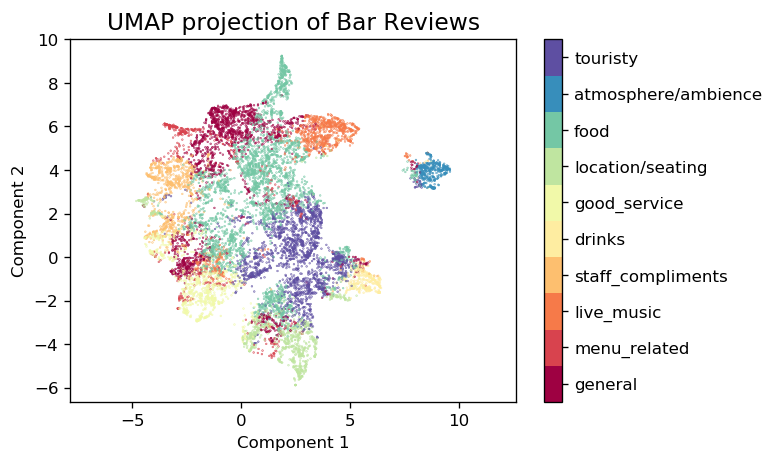

In [511]:
#Plot the graph 

plt.figure(dpi=120)
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Component 1') 
plt.ylabel('Component 2')
plt.title('UMAP projection of Bar Reviews', fontsize=14);
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(doc_topic_nmf.columns)
plt.savefig('UMAP.png')

#### 3. LDA 

#### LDA with CountVectorizer

In [409]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(X_cv)

In [410]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [411]:
lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=5)

In [412]:
lda.print_topics()

[(0,
  '0.004*"fish chip place" + 0.003*"final star" + 0.003*"didnt match" + 0.003*"day ended" + 0.003*"come afternoon" + 0.003*"although cant" + 0.003*"disappointed menu" + 0.003*"damn well" + 0.003*"comfy around dance" + 0.003*"alcoholic nonalcoholic"'),
 (1,
  '0.004*"back book" + 0.004*"draw way" + 0.003*"first took" + 0.003*"cream sauce" + 0.003*"else offer" + 0.003*"couple something" + 0.003*"coming going" + 0.002*"chip fish chip" + 0.002*"flat time" + 0.002*"drink cheap"'),
 (2,
  '0.005*"excellent summer" + 0.004*"best small" + 0.003*"close royal" + 0.003*"always recommend" + 0.003*"brass monkey" + 0.003*"dinner last" + 0.003*"expensive depending" + 0.003*"depending day" + 0.003*"cool definitely" + 0.003*"delicious cheese"'),
 (3,
  '0.005*"bonus book" + 0.004*"dessert however" + 0.004*"definitely back" + 0.003*"almost quite" + 0.003*"cake say" + 0.003*"around pint" + 0.003*"free table" + 0.003*"extensive cocktail menu" + 0.003*"beer super" + 0.003*"almost right"'),
 (4,
  '0.0

In [413]:
lda_corpus = lda[corpus]
lda_corpus

In [414]:
lda_docs = [doc for doc in lda_corpus]

In [415]:
lda_docs

[[(0, 0.02002046),
  (1, 0.02002046),
  (2, 0.02002046),
  (3, 0.02002046),
  (4, 0.02002046),
  (5, 0.02002046),
  (6, 0.02002046),
  (7, 0.21997972),
  (8, 0.61985666),
  (9, 0.02002046)],
 [(0, 0.020019623),
  (1, 0.22012861),
  (2, 0.020019623),
  (3, 0.020019623),
  (4, 0.020019623),
  (5, 0.41974083),
  (6, 0.020019623),
  (7, 0.21999322),
  (8, 0.020019623),
  (9, 0.020019623)],
 [(0, 0.025037328),
  (1, 0.025037328),
  (2, 0.025037328),
  (3, 0.025037328),
  (4, 0.025037328),
  (5, 0.025037328),
  (6, 0.025037328),
  (7, 0.025037328),
  (8, 0.025037328),
  (9, 0.77466404)],
 [(0, 0.02500662),
  (1, 0.02500662),
  (2, 0.02500662),
  (3, 0.02500662),
  (4, 0.5250389),
  (5, 0.02500662),
  (6, 0.02500662),
  (7, 0.025008148),
  (8, 0.02500662),
  (9, 0.27490667)],
 [(0, 0.020008449),
  (1, 0.020010535),
  (2, 0.020008449),
  (3, 0.020008449),
  (4, 0.020008449),
  (5, 0.21998283),
  (6, 0.020008449),
  (7, 0.02000938),
  (8, 0.020010926),
  (9, 0.61994416)],
 [(0, 0.025005527),
  

#### LDA with TF-IDF

In [521]:
# Convert sparse matrix of counts to a gensim corpus
corpus1 = matutils.Sparse2Corpus(tfidf_result)

In [522]:
id2word = dict((v, k) for k, v in tfidf.vocabulary_.items())

In [523]:
lda = models.LdaModel(corpus=corpus1, num_topics=10, id2word=id2word, passes=5)

IndexError: index 8176 is out of bounds for axis 1 with size 6875

In [419]:
lda.print_topics()

[(0,
  '0.004*"fish chip place" + 0.003*"final star" + 0.003*"didnt match" + 0.003*"day ended" + 0.003*"come afternoon" + 0.003*"although cant" + 0.003*"disappointed menu" + 0.003*"damn well" + 0.003*"comfy around dance" + 0.003*"alcoholic nonalcoholic"'),
 (1,
  '0.004*"back book" + 0.004*"draw way" + 0.003*"first took" + 0.003*"cream sauce" + 0.003*"else offer" + 0.003*"couple something" + 0.003*"coming going" + 0.002*"chip fish chip" + 0.002*"flat time" + 0.002*"drink cheap"'),
 (2,
  '0.005*"excellent summer" + 0.004*"best small" + 0.003*"close royal" + 0.003*"always recommend" + 0.003*"brass monkey" + 0.003*"dinner last" + 0.003*"expensive depending" + 0.003*"depending day" + 0.003*"cool definitely" + 0.003*"delicious cheese"'),
 (3,
  '0.005*"bonus book" + 0.004*"dessert however" + 0.004*"definitely back" + 0.003*"almost quite" + 0.003*"cake say" + 0.003*"around pint" + 0.003*"free table" + 0.003*"extensive cocktail menu" + 0.003*"beer super" + 0.003*"almost right"'),
 (4,
  '0.0

In [420]:
lda_corpus1 = lda[corpus1]
lda_corpus1

<div class="alert alert-block alert-success">
<b>Model choice:</b> Choosing TF-IDF for vectorizer and NMF for topic modeling.
</div>

#### Recommender System

In [421]:
#Take a user input: 

t = ['bar with sticky toffee pudding']

In [422]:
#vectorize in the context of our model
vt = tfidf.transform(t)   #use TFIDF 

In [423]:
vt.shape

(1, 6875)

In [424]:
#topics for model 
tt = nmf_model.transform(vt)   #NMF model 

In [425]:
tt.shape

(1, 10)

In [512]:
#Write function to output name of restaurant ---use code above and compile 

def recommender(string): 
    text =[string]
    vt = tfidf.transform(text)
    tt = nmf_model.transform(vt)
    recs = pairwise_distances(tt,doc_topic,metric='cosine').argsort()
    top5=recs[0][0:5].tolist()
    
    top5rest=[]
    for x in top5: 
        rest_row=reviews.loc[x]
        top5rest.append(rest_row['name']) 
    print(top5rest)    
    #return top5rest

In [513]:
#User will input something they want 
recommender('gin and tonic')

['"Roseleaf"', '"Tupiniquim"', '"The Tass"', '"Amber Restaurant"', '"The Illicit Still"']
